# MHKiT CDIP IO

MHKiT includes functions to pull data directly from  the Coastal Data Information Program ([CDIP](http://cdip.ucsd.edu/m/about/)), an extensive network for monitoring waves and beaches along the coastlines of the United States.

To run this example of using CDIP and its data in MHKiT we will start by importing the necessary python packages (`scipy`, `pandas`, `numpy`), and MHKiT wave submodules (`resource`, `graphics`, and `io.ndbc`).

In [1]:
from mhkit.wave import graphics
from mhkit.wave.io import cdip
import matplotlib.pyplot as plt

## Quick Start

The `request_parse_workflow` function is your one-stop shop for pulling and parsing data. It wraps MHKiT's `request_data` function so that if a station number is passed the function will pull the buoy data from the CDIP servers and then proceed to process the data for the user. `request_parse_workflow` allows the user to slice data between a start and/or end date. Alternatively, the user may specify a single year or multiple years of interest. To reduce processing time `request_parse_workflow` will allow the user to specify parameters of interest and only return data for the specified parameters. By default, the `request_parse_workflow` will pull historic data but the user may also specify real-time data if interested. Lastly, due to the long processing time two-dimensional (2D) data is not returned by default. If __all__ 2D data is desired the boolean `all_2D_variables`  may be specified as True. It is recommended however that if 2D data is needed that the user passes that parameter in the parameters field. For a full list of 1D, 2D, and metadata variables see the CDIP reference [here](https://docs.google.com/document/d/1Uz_xIAVD2M6WeqQQ_x7ycoM3iKENO38S4Bmn6SasHtY/edit) (see BUOY VARIABLES).

In [2]:
from mhkit.wave.io import cdip
import matplotlib.pyplot as plt

station_number = "100"
start_date = "2020-04-01"
end_date = "2020-04-30"
parameters = ["waveHs", "waveTp", "waveMeanDirection"]

data = cdip.request_parse_workflow(
    station_number=station_number,
    parameters=parameters,
    start_date=start_date,
    end_date=end_date,
)

print("\n")
print(f"Returned data: {data.keys()} \n")

Processing 2D Variables:


Returned data: dict_keys(['data', 'metadata']) 



## 1. Request Data from CDIP
   
In the above example `request_parse_workflow` is used to both request and parse the CDIP data using multiple MHKiT functions in a presepecfied workflow for the user. Here, we will start by running the consituient functions which make up parse data.

To get started we will take a look at the `request_netCDF` function and what is needed to call it. Requesting the NetCDF file is broken out to provide users flexibility by taking a modular approach to the data request. This is useful for the user to make custom workflows beyond what `request_parse_workflow` does currently and can also be used if the user prefers to work with the requested data in a tool such as xarray instead of the returned dictionary of dataframes. 

MHKiT can be used to request historical or realtime data from the CDIP buoys. A station table and map can be found here to determine a buoy of interest http://cdip.ucsd.edu/m/stn_table/. To get started we will call historic data from station number 100. The function will return a netCDF file with all historic data.

In [3]:
station_number = "100"
data_type = "historic"
nc = cdip.request_netCDF(station_number, data_type)

## 2. Processing the NetCDF file

The returned NetCDF file stored as the nc file above may now be passed to the `get_netcdf_variables` function to extract the data into a dictionary with a DataFrame of 1D variables and the metadata. The 'data' and 'metadata' each hold different types of data based based on a prefix used on the variable returned by CDIP. Example prefixs are 'wave', 'sst', and 'gps' which are described in further detail below.

In [4]:
buoy_data = cdip.get_netcdf_variables(nc)

print(f"Returned data: {buoy_data.keys()} \n")

Returned data: dict_keys(['data', 'metadata']) 



### 2.a The 'data' key
As can be seen above the function has returned a dictionary with two keys:

    1. 'data' - dictionary of DataFrames with keys reffering to the data type. Possible keys include
        a. 'wave' - includes processed variables such as Hs, and Tp
        b. 'sst' - timeseries of sea surface tempature
        c. 'gps' - timeseries of buoy latitude and longitude
        d. 'dwr' - directional waverider contains information about accelerometer and buoy batery level
        e. 'wave2D' - dictionary of dataframes which are of length time and have columns of wave frequency.
    2. 'metadata' - any other data that was not of length time of a 2D variable. This has the same keys as the 'data' key above.
        a. 'meta' - processed variables which started with the meta prefix and are not part of the variable prefixs listed below
        b. 'wave' - includes processed variables such as Hs, and Tp
        c. 'sst' - timeseries of sea surface tempature
        d. 'gps' - timeseries of buoy latitude and longitude
        e. 'dwr' - directional waverider contains information about accelerometer and buoy batery level
        f. 'wave2D' - dictionary of dataframes which are of length time and have columns of wave frequency.
    
By calling on the dictionary key ['data']['wave'] we can see the associated DataFrame for the wave data. The DataFrame is summarized below where one can see both the time index and values of each column.

In [5]:
buoy_data["data"]["wave"]

,waveFlagSecondary,wavePeakPSD,waveTa,waveSourceIndex,waveHs,waveTime,waveDp,waveTz,waveFlagPrimary,waveTp
2001-01-30 00:17:11,0.0,1.255072,5.635270,1.0,0.97,9.808138e+08,275.96875,4.597701,1.0,14.285714
2001-01-30 00:47:10,0.0,1.022441,5.248230,1.0,0.95,9.808156e+08,266.12500,4.347826,1.0,14.285714
2001-01-30 01:17:11,0.0,0.607862,4.967487,1.0,0.93,9.808174e+08,252.06250,4.166667,1.0,15.384616
2001-01-30 01:47:10,0.0,1.728395,5.265260,1.0,1.03,9.808192e+08,275.96875,4.395604,1.0,13.333333
2001-01-30 02:17:10,0.0,1.107597,5.288306,1.0,1.00,9.808210e+08,275.96875,4.395604,1.0,13.333333
...,...,...,...,...,...,...,...,...,...,...
2023-01-27 16:30:00,0.0,1.872348,11.459893,18.0,0.78,1.674837e+09,207.87500,8.888889,1.0,15.384616
2023-01-27 17:00:00,0.0,2.356537,11.243089,18.0,0.85,1.674839e+09,210.68750,8.510638,1.0,15.384616
2023-01-27 17:30:00,0.0,2.153713,11.228789,18.0,0.80,1.674841e+09,213.50000,8.695652,1.0,15.384616
2023-01-27 18:00:00,0.0,2.489777,10.836035,18.0,0.81,1.674842e+09,224.75000,8.510638,1.0,15.384616


### 2.b The 'metadata' key

The metadatakey stores anything not of length time for each of the previous keys. This dictionary also has the 'meta' key for any data returned with started with the meta  keyword.


In [6]:
buoy_data["metadata"].keys()

dict_keys(['wave', 'sst', 'gps', 'dwr', 'meta', 'name'])

In [7]:
buoy_data["metadata"]["meta"]

{}

## 3. Plotting

The wave graphics module has two CDIP stylized plots [boxplot](http://cdip.ucsd.edu/themes/media/docs/documents/html_pages/annualHs_plot.html) and [compendium](http://cdip.ucsd.edu/themes/media/docs/documents/html_pages/compendium.html).  The CDIP scripts these are based on are hyperlinked. 

### 3.a. The Box Plot
The CDIP stylized box plot is designed to group a passed parameter by months and display descriptive statistics. Below the plot is a general box plot legend showing the outliers as red plus signs, the 25 percentile and 75 percentile mark the edges of the box. The median is shown in as a red line in the box and the mean is shown as a green line with the mean annotated in green above the line. The x-axis has the month name at the bottom and the number of data points in each month at the top.


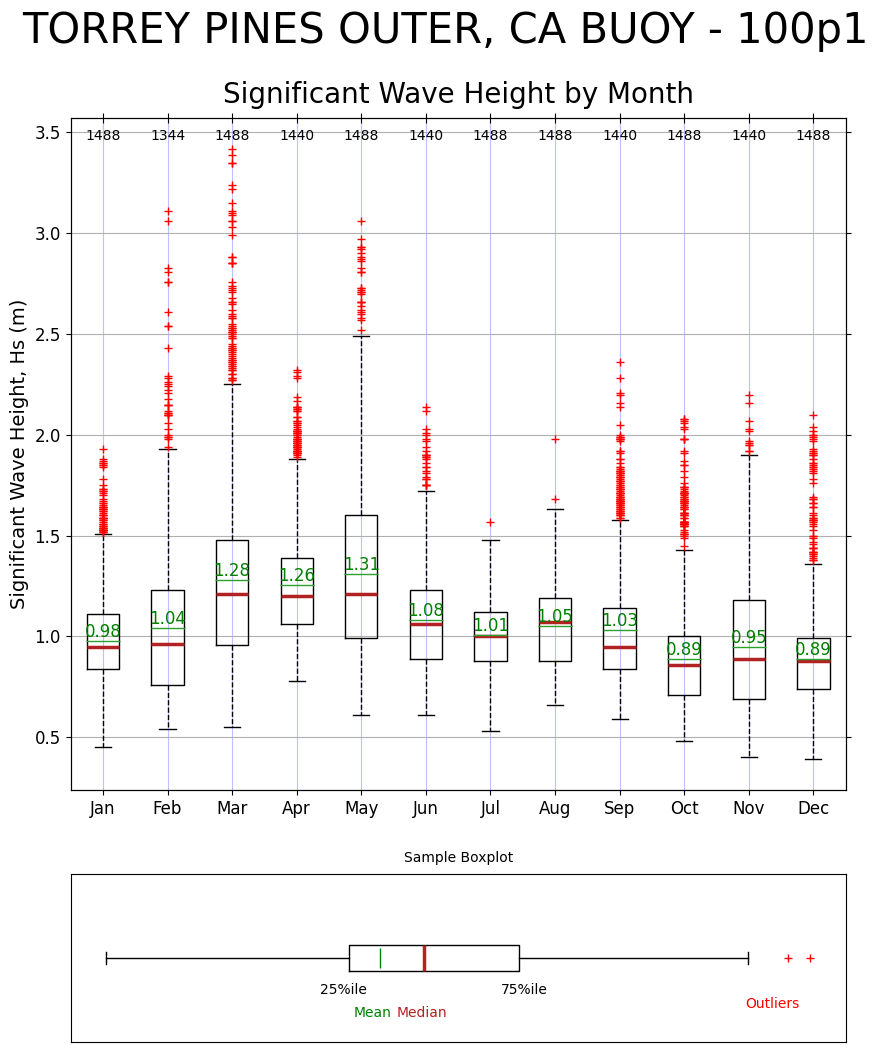

In [8]:
Hs_2011_data = buoy_data["data"]["wave"]["waveHs"]["2011"]
buoy_name = buoy_data["data"]["wave"].name
ax = graphics.plot_boxplot(Hs_2011_data, buoy_title=buoy_name)

### 3.b. CDIP Conpendium plot

The compendium plot is a time series summary plot of three variables ( Hs, Tp, and Dp). To return the plot simply pass these variable from the `['data']['wave']` dataframe.

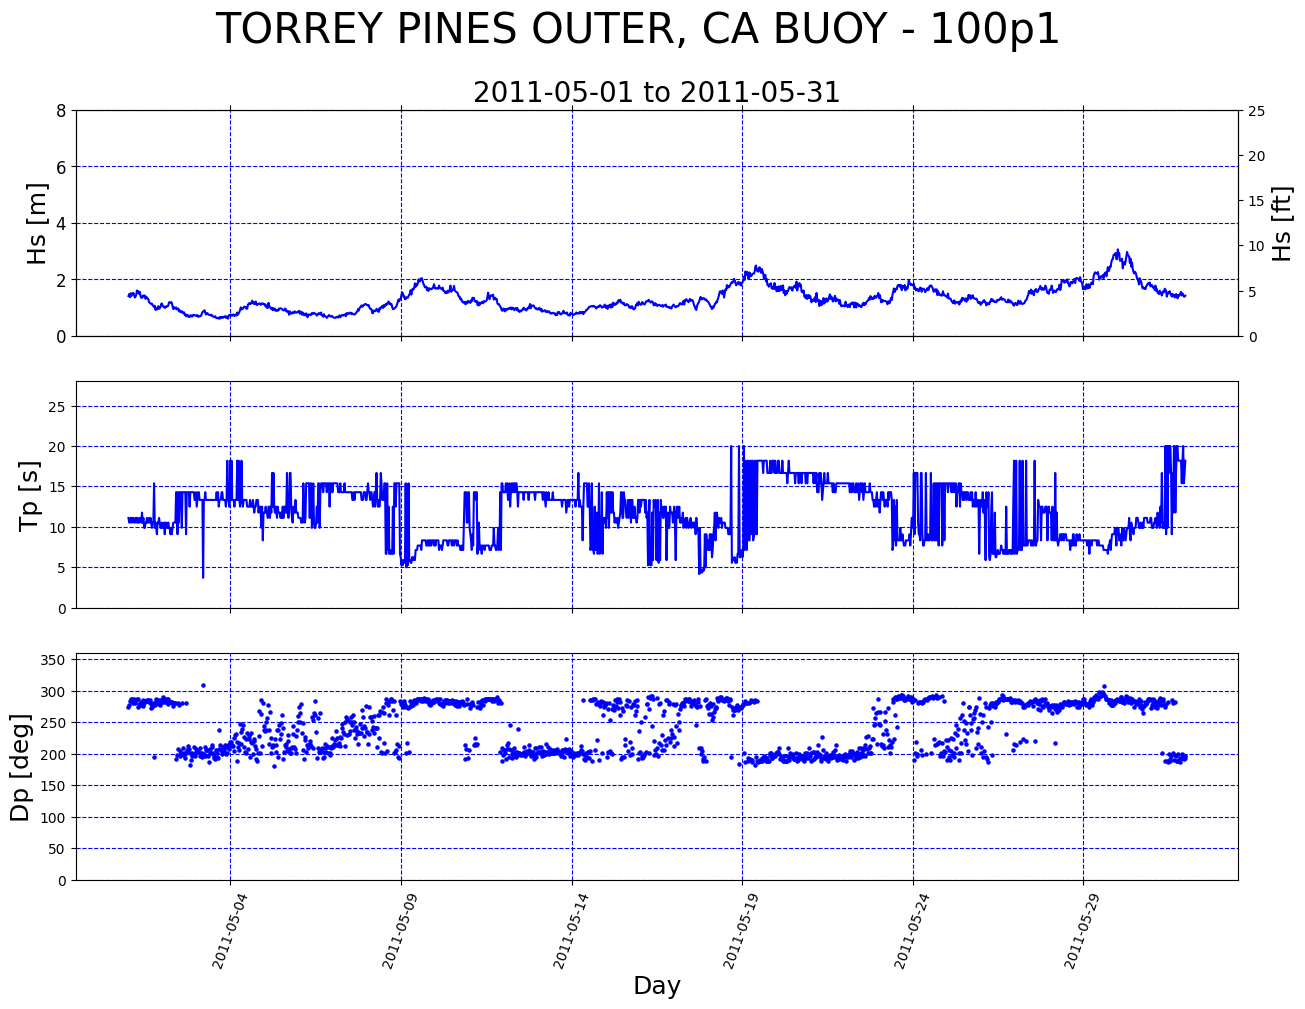

In [9]:
wave_data_May_2011 = buoy_data["data"]["wave"].loc["2011-05"]
Hs = wave_data_May_2011["waveHs"]
Tp = wave_data_May_2011["waveTp"]
Dp = wave_data_May_2011["waveDp"]

ax = graphics.plot_compendium(Hs, Tp, Dp, buoy_name)

## 4. Advanced queries 
In this section we will show how to slice on time ranges of interest.

### 4.a. `get_netcdf_variable`

`get_netcdf_variables` iterates over and extracts variables from CDIP bouy netCDF file. It takes inputs of `start_date`, `end_date`, `parameters`, and `all_2D_variables`. The start and end date parameters allow us to specify string dates of interest in which to include data after the start date and before the end date. These are specified as a string with precision down to the day in 'YYYY-MM-DD' format. Specifying particular parameters of interest allows for faster processing times and data handeling. For a complete list of parameters see Bouy Variables [here](https://docs.google.com/document/d/1Uz_xIAVD2M6WeqQQ_x7ycoM3iKENO38S4Bmn6SasHtY/edit). Lastly, we can specify to run all 2D variables, although this is not reccomended unless a user truly plans to use all the data becuase of the significant processing time.

For an example we will create a box-plot of HS for the year 2011 from the nc file requested earlier.


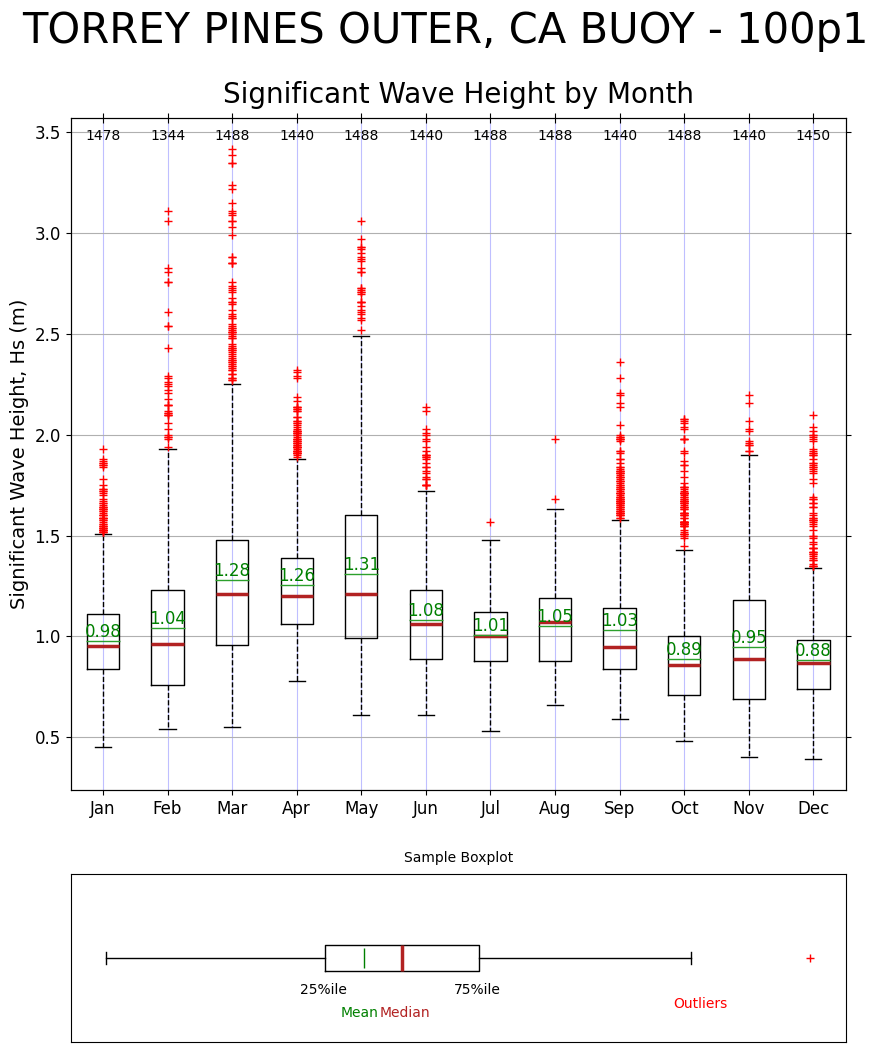

In [10]:
buoy_data = cdip.get_netcdf_variables(
    nc, start_date="2011-01-01", end_date="2011-12-31", parameters="waveHs"
)
buoy_name = buoy_data["data"]["wave"].name
ax = graphics.plot_boxplot(buoy_data["data"]["wave"]["waveHs"], buoy_title=buoy_name)

## 4.b. `request_parse_workflow`

In the previous example we requested the NetCDF file and then processed the data. This workflow has been codified into a single function to streamline the process and adds additional functionality as well. The `request_parse_workflow` function accepts a netCDF object or a station number. This means the user may pass a CDIP netCDF file loaded from file, pull the data with `request_netcdf` and then pass, or just pass a station number letting the function know what data to parse and return. Secondly, the `request_parse_workflow` function accepts parameters allowing the user to specify to only return specific parameters reducing processing requirements. This is especially useful for processing 2D data which is only processed is specifically requested due to the amount of time it takes to process all the 2D data. A print statement indicates whether the function is currently still processing 2D variables. Use the `silent=True` keyword argument to turn off this print statement in production environments.

Next, `request_parse_workflow` will slice on time by years, start_date, or end date. Years can be a single integer or a list of integers and is not required to be consecutive. If specified the start date will remove any data prior to the specified string (e.g. '2011-01-01') and end_date will remove any data after the speficied date. start_date and end_date may be used together, seperatly or not at all. Years works indpendently of start and end date. Next, the data_type defaults to historic but specifying this as realtime will return realtime data from the buoy. Lastly, there is a the boolean `all_2D_variables`. If set to true the function will return all of the wave 2D variables. It is not recommended to do this due to the computational expense to do so, Instead it is recommended to specify 2D quantities of interest using the `parameters` keyword.

For an example we will create a compendium of HS for the year 2011 from the nc file requested earlier. In this case we can use the years parameter instead of start and end dates.


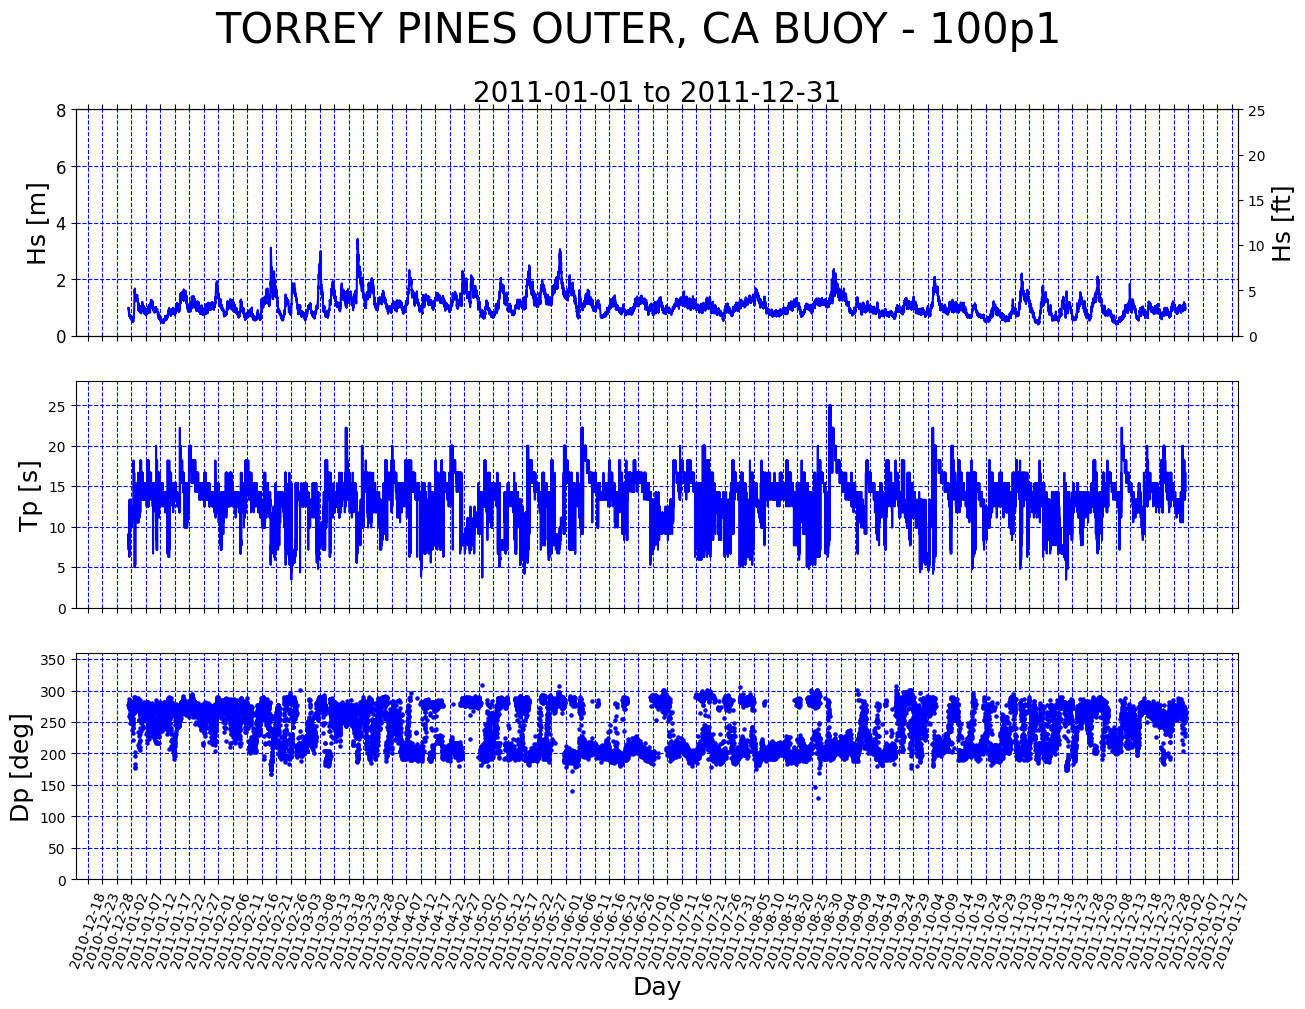

In [11]:
buoy_data = cdip.request_parse_workflow(
    station_number="100", years=2011, parameters=["waveHs", "waveTp", "waveDp"]
)

Hs = buoy_data["data"]["wave"]["waveHs"]
Tp = buoy_data["data"]["wave"]["waveTp"]
Dp = buoy_data["data"]["wave"]["waveDp"]
buoy_name = buoy_data["metadata"]["name"]
ax = graphics.plot_compendium(Hs, Tp, Dp, buoy_name)